## The Logistic Family

We had a worksheet in class that did several things:

1. Explained the dynamics of quadratic maps with zero or one fixed point.

2. Proved that if a quadratic has two fixed points, it is conjugate via an affine linear map to a map of the form
$$F_\mu(x) = \mu x (1-x).$$
where $\mu>1$. These maps form the <i>Logistic family of maps</i>.

One trivial remark is that if $\mu>1$, then every point in $(-\infty,0) \cup (1, \infty)$ is forward asymptotic to $-\infty$. This is because $F_\mu(x)<x$ whenever $x \in (-\infty,0)$ guaranteeing from prior arguments that points in $(-\infty,0)$ tend to $-\infty$. Also if $x>1$, then $F_\mu(x)<0$, so again $x$ will be forward asymptotic to $-\infty$.

Because of this we will concentrate on understanding the dynamics on the interval $[0,1]$.

The goal of this notebook is to take a tour through the Logistic family as $\mu$ increases from the value one. Below we define the logistic family:

In [1]:
def F(mu):
    def F_mu(x):
        return mu*x*(1-x)
    return F_mu

For example F(3/2) can be plotted as follows:

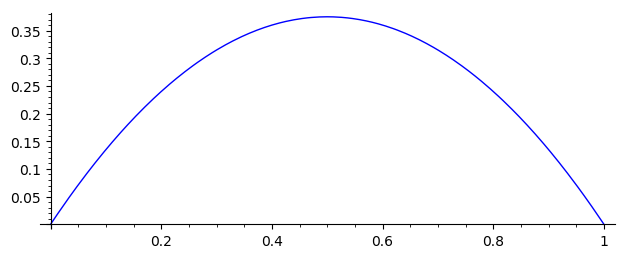

In [2]:
G = F(3/2)
plot(G, 0, 1, aspect_ratio = 1)

The value $\mu$ represents $F'(0)$. Observe also that zero is fixed. Since $\mu>0$, this point represents a repelling fixed point.

The other fixed point is at the point 
$$p_\mu = \frac{\mu-1}{\mu}.$$
We define this point as a function of mu:

In [3]:
def p(mu):
    return (mu-1)/mu

We can check symbolically that $p_\mu$ is indeed fixed by $F_\mu$:

In [4]:
mu = var("mu") # make mu into a symbolic variable
bool(F(mu)(p(mu)) == p(mu)) # Attempt to evaluate the equation as true or false.

True

More on symbolic expressions can be found here: 
http://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/expression.html

Now we consider the multiplier of the fixed point $p_\mu$. This is just the value $F_\mu'(p_\mu)$. Here we have Sage compute $F_\mu'$:

In [5]:
x = var("x")
F_prime = F(mu)(x).derivative(x)
F_prime

-mu*(x - 1) - mu*x

Below we demonstrate that 
$$F'_\mu(p_\mu)=2-\mu.$$
Note that `F_prime` is an algebraic expression in the variables `x`and `mu`. We can substitute a value for `x` using the `subs()` method which takes as input a mapping. We will map `x` to `p(mu)`. The `.simplify_full()` method attempts to simplify the resulting expression.

In [6]:
F_prime.subs({x:p(mu)}).simplify_full()

-mu + 2

Observe that:

1. We have $0<F'_\mu(p_\mu)<1$ when $\mu \in (1,2)$. This means that $p_\mu$ is an attracting fixed point, and that $F'_\mu$ is a one-to-one orientation preserving map in a sufficiently small open neighborhood of $p_\mu$. (An {\em open neighborhood of $p_\mu$ is an open set containing $p_\mu$ such as the interval $(p_\mu-\epsilon, p_\mu+\epsilon)$ for $\epsilon>0$ small.)

2. In the case $\mu=2$, we have $F'_\mu(p_\mu)=0$. This means that $p_\mu=\frac{1}{2}$ since $\frac{1}{2}$ is the only critical point. Since $F'_\mu(p_\mu)=0$, $p_\mu$ is a {\em super-attracting fixed point}. Furthemore, because $p_\mu$ coincides with the critical point, the map $F_\mu$ is never one-to-one on a neighborhood of $p_\mu$.

3. We have $-1<F'_\mu(p_\mu)<0$ when $\mu \in (2,3)$. This means that $p_\mu$ is an attracting fixed point, that $F'_\mu$ is a one-to-one orientation-reversing map in a small neighborhood of $p_\mu$.

4. When $\mu>3$, we have that $F'_\mu(p_\mu)<-1$. At this point $p_\mu$ has become a repelling fixed point.

It follows from the above facts that two maps taken from different cases above are not topologically conjugate. For example, a map from case 1 is not conjugate to a map from case 3, because in case 1, the attracting fixed point $p_\mu$ is locally orientation preserving, whiel in case 3 the attracting fixed point is locally orienation reversing.

In fact it can be shown that two maps taken from case 1 are topologically conjugate, and two maps taken from case 3 are topologically conjugate. The topological conjugacy can not be a diffeomorphism because conjugacy by a diffeomorphism preserves multipliers at fixed and periodic points. (Excercise: Show this is true.)

Now we will attempt to understand the dynamics of these maps for values of $\mu$ running from $1$ to a little bigger than $3$.

## The case when $\mu \in (1,2)$.

This cobweb function was taken from an earlier notebook:

In [7]:
def cobweb(x, T, N, xmin, xmax):
    cobweb_path = [(x,x)]
    for i in range(N):
        y = T(x) # Reassign y to be T(x).
        cobweb_path.append( (x,y) )
        cobweb_path.append( (y,y) )
        x = y # Reassign x to be identical to y.
    cobweb_plot = line2d(cobweb_path, color="red", aspect_ratio=1)

    function_graph = plot(T, (xmin, xmax), color="blue")
    
    # define the identity map:
    identity(t) = t
    id_graph = plot(identity, (xmin, xmax), color="green")
    
    return cobweb_plot + function_graph + id_graph

Here is an example of a cobweb plot in the case $\mu=\frac{3}{2}$ starting at $x=0.1$, plotting 10 iterations over the interval $(0,1)$.

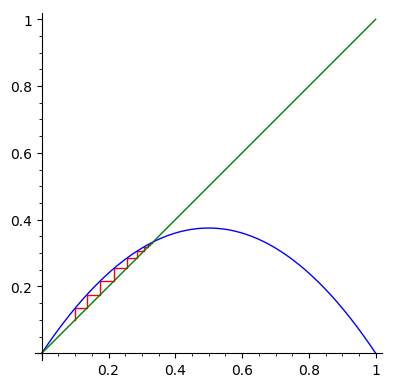

In [8]:
cobweb(0.1, F(3/2), 10, 0, 1)

We will use sliders to allow experimentation. A slider can be created decribing values in the interval $[1,2]$ with a step size of $0.001$ and initial value $3/2$ as below:

In [9]:
slider(1, 2, 0.001, 3/2)

TransformFloatSlider(value=1.5, max=2.0, min=1.0, step=0.001)

We want to be able to vary $\mu \in (1,2)$ and vary $x \in (0,1)$. We can use the `@interact` decorator for a function to do this. The values of the sliders will be used as input to a function which is run whenever the sliders are updated.

In [10]:
@interact
def iteractive_plot(mu = slider(1, 2, 0.001, 3/2),
                    x = slider(0, 1, 0.001, 1/2)):
    return cobweb(x, F(mu), 10, 0, 1)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIGl0ZXJhY3RpdmVfcGxvdCBhdCAweDdmMDRjN2IwYWY1MD4gd2l0aCAyIHdpZGdldHMKICBtdTogVHJhbnNmb3JtRmxvYXRTbGlkZXIodmHigKY=


From looking at the Cobweb plot, you should be convinced that:

1. Any point $x \in (0, p_\mu)$ has an orbit which increases and accumulates on $p_\mu$. To prove this, it suffices to show that 
$x \in (0, p_\mu)$ implies $x < F_\mu(x) < p_\mu$ and apply our standard argument.

2. Any point $x \in (p_\mu,\frac{1}{2}]$ has an orbit which decreases down toward $p_\mu$. Again it suffices to show that if $x \in (p_\mu,\frac{1}{2}]$, then $p_\mu < F_\mu(x) < x$.

3. If $x \in (\frac{1}{2}, 1)$, then $0 < F_\mu(x) < \frac{1}{2}$. From this and statements 1 and 2 above, it follows that $x$ is forward asymptotic to $p_\mu$.

The above shows that $W^s(p_\mu)=(0,1)$, which completely describes the dynamics on $[0,1]$. Every point in $(0,1)$ is forward asymptotic to $p_\mu$. (Also, zero is fixed and $F_\mu(1)=0$.)

## The case $\mu=2$.

Recall that $F_2$ has a super-attracting fixed point. The point $p_\mu=\frac{1}{2}$ is both a critical point and fixed. The following code lets you experiment with this case.

In [11]:
@interact
def iteractive_plot(x = slider(0, 1, 0.001, 1/4)):
    return cobweb(x, F(2), 10, 0, 1)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIGl0ZXJhY3RpdmVfcGxvdCBhdCAweDdmMDRjN2IxYmU2MD4gd2l0aCAxIHdpZGdldAogIHg6IFRyYW5zZm9ybUZsb2F0U2xpZGVyKHZhbHXigKY=


Similar analysis to the previous case can be used to prove that every point in $(0,1)$ is forward asymptotic to the super-attracting fixed point $p_\mu=\frac{1}{2}$.

## The case of $\mu \in (2,3)$.

You can experiment with the maps below:

In [12]:
@interact
def iteractive_plot(mu = slider(2, 3, 0.001, 2.5),
                    x = slider(0, 1, 0.001, 0.9)):
    return cobweb(x, F(mu), 20, 0, 1)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIGl0ZXJhY3RpdmVfcGxvdCBhdCAweDdmMDRjN2IxYjdkMD4gd2l0aCAyIHdpZGdldHMKICBtdTogVHJhbnNmb3JtRmxvYXRTbGlkZXIodmHigKY=


The dynamics are a bit more complex because locally $F_\mu$ is orientatation-reversing in a neighborhood of $p_\mu$. This causes orbits to spiral inward rather than approach directly.

By experimenting with the cobweb plots above, you should be convinced that all orbits are asymptotic to the fixed point $p_\mu$.

<b>Theorem.</b> When $2<\mu<3$, all orbits in $(0,1)$ are asymptotic to $p_\mu$.

We will give a proof of this using the following claim about the interval $I = [\frac{1}{2}, 2 p_\mu-\frac{1}{2}]$. 

<b>Claim.</b> Suppose $2<\mu<3$.

1. The interval is symmetric around $p_\mu$.

2. We have $F_\mu(\frac{1}{2}) \in I$. Note that $F_\mu(\frac{1}{2})$ is the maximum value taken by $F_\mu$.

3. We have $-1 < (F^2_\mu)'(x) < 1$ for each $x \in I$. 

<i>Proof of 1.</i> It is symmetric around $p_\mu$ because the endpoints are at equal distance from $p_\mu$. Observe
$$|p_\mu-\frac{1}{2}|=p_\mu-\frac{1}{2} = |p_\mu-(2 p_\mu-\frac{1}{2})|.$$

<i>Graphical "proof" of 2.</i> We can consider plotting the left and right endpoints of $I$ as well as $F_\mu(\frac{1}{2})$. We plot the left endpoint in green, the right endpoint in blue, and the $F_\mu(\frac{1}{2})$ in red below. All are expressed as a function of $\mu$.

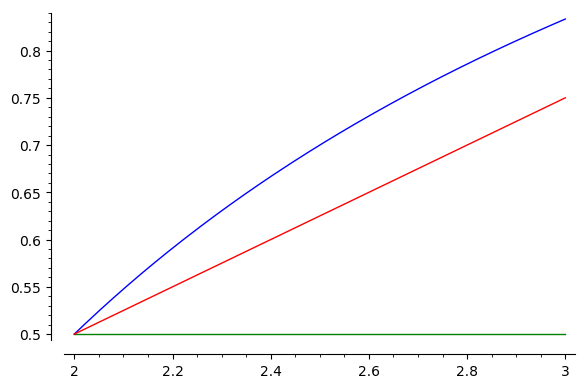

In [13]:
plt = plot(1/2, 2, 3, color="green")
plt += plot(2*p(mu)-1/2, 2, 3, color="blue")
plt += plot(F(mu)(1/2), 2, 3, color="red")
plt

<i>Graphical "proof" of 3.</i> We plot $(F^2_\mu)'(x)$ as a function of $x$ below, allowing the choice of $\mu$ with a slider. We also add plots of the constant function $-1$ and the constant function $1$.

In [14]:
@interact
def iteractive_plot(mu = slider(2, 3, 0.001, 2.5)):
    x = var("x")
    F_mu = F(mu)
    square = F_mu(F_mu(x))
    plt = plot(square.derivative(x), 1/2, 2*p(mu)-1/2, color="blue")
    plt += plot(-1, 1/2, 2*p(mu)-1/2, color="red")
    plt += plot(1, 1/2, 2*p(mu)-1/2, color="red")
    return plt

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIGl0ZXJhY3RpdmVfcGxvdCBhdCAweDdmMDRjN2IxYmMwOD4gd2l0aCAxIHdpZGdldAogIG11OiBUcmFuc2Zvcm1GbG9hdFNsaWRlcih2YWzigKY=


<b>Proposition.</b> If $x \in I$, then the orbit of $x$ is forward asymptotic to $p_\mu$. 

<i>Proof:</i> We use the Claim. Since $|(F_\mu^2)'(t)|$ is a continuous function of $t$, it attains a maximum on $I$. Call this value $C$. By statement 3 of the claim, we know $C<1$. Then by the Mean Value Theorem, we see that for any $x \in I$, we have 
$$|F_\mu^2(x)-p_\mu| < C |x - p_\mu|.$$
Since $F_\mu^2(x)$ is closer to $p_\mu$ than $x$ and $I$ is symmetric around $p_\mu$, it must be that $F_\mu^2(x) \in I$. Then by induction we see that for any $x \in I$ and any $k>0$, we have
$$|F_\mu^{2k}(x)-p_\mu| < C^k |x - p_\mu|.$$
Since $C<1$, the right hand side tends to zero as $k \to +\infty$. Thus, we have that $\lim_{k \to +\infty} F_\mu^{2k}(x)=p_\mu$.
This shows that the orbit of $x$ is forward asymptotic to $p_\mu$. as desired. <span style="float:right">□</span>

<i>Proof of the Theorem.</i> Now we will show that all points are forward asymptotic to $p_\mu$.

From the proposition above, we already know that the statement is true on the interval $I=[\frac{1}{2}, 2 p_\mu-\frac{1}{2}]$. 

Now consider the case of $x \in (0,\frac{1}{2})$. Observe that if $x \in (0,\frac{1}{2})$, then $F_\mu(x)>x$. Since there are no fixed points in the interval $(0,\frac{1}{2})$, points in the orbit increase until at some point we reach a $F_\mu^n(x) \geq \frac{1}{2}$. Since $F_\mu^n(x)$ is in the image of $F_\mu$, it is less than or equal to the maximum $F_\mu(\frac{1}{2})$ taken. Thus from statement (2) of the claim we know that $F_\mu^n(x) \in I$. But then it follows from the Proposition above that $F_\mu^n(x)$ is forward asymptotic to $p_\mu$. But, then $x$ must be forward asymptotic to $p_\mu$ as well.

We already know $\frac{1}{2}$ is forward asymptotic to $p_\mu$ since $\frac{1}{2} \in I$. Now consider the $x>\frac{1}{2}$. Let $y=1-x$,
which is less than $\frac{1}{2}$. Then we know from the previous paragraph that $y$ is forward asymptotic to $p_\mu$. But we also have that $F_\mu(x)=F_\mu(y)$ and thus $F^n_\mu(x)=F^n_\mu(y)$ for all $n \geq 1$. Thus $x$ must also be forward asymptotic to $p_\mu$. <span style="float:right">□</span>

In [15]:
@interact
def iteractive_plot(mu = slider(2, 3, 0.001, 2.5),
                    x = slider(0, 1, 0.001, 0.9)):
    plt = cobweb(x, F(mu), 20, 0, 1)
    plt += line2d([(1/2,1/2),(2*p(mu)-1/2,2*p(mu)-1/2)],thickness=2,color="purple")
    return plt

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIGl0ZXJhY3RpdmVfcGxvdCBhdCAweDdmMDRjMDNjNjQ4OD4gd2l0aCAyIHdpZGdldHMKICBtdTogVHJhbnNmb3JtRmxvYXRTbGlkZXIodmHigKY=


# Passing through $\mu=3$. 

At the value of $3$, the point $p_\mu$ is slowly attracting.

In [16]:
@interact
def iteractive_plot(x = slider(0, 1, 0.001, 0.9)):
    return cobweb(x, F(3), 200, 0, 1)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIGl0ZXJhY3RpdmVfcGxvdCBhdCAweDdmMDRjMDNjNjJhOD4gd2l0aCAxIHdpZGdldAogIHg6IFRyYW5zZm9ybUZsb2F0U2xpZGVyKHZhbHXigKY=


Aside from looking at the cobweb plot above, a good way to convince yourself of this is to look at the square. Here we define the square $F_\mu^2(x)$:

In [17]:
def F2(mu):
    F_mu = F(mu)
    def F2_mu(x):
        return F_mu(F_mu(x))
    return F2_mu

In [18]:
@interact
def iteractive_plot(x = slider(0, 1, 0.001, 0.9)):
    return cobweb(x, F2(3), 200, 0, 1)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIGl0ZXJhY3RpdmVfcGxvdCBhdCAweDdmMDRjMDNjNmI5MD4gd2l0aCAxIHdpZGdldAogIHg6IFRyYW5zZm9ybUZsb2F0U2xpZGVyKHZhbHXigKY=


The following lets you see what happens when you vary $\mu$ through the value of $3$. We plot on a small interval containing $p_\mu$.

In [19]:
@interact
def iteractive_plot(mu = slider(2.9, 3.2, 0.001, 2.95),
                    x = slider(0.5, 0.8, 0.001, 0.73)):
    return cobweb(x, F(mu), 200, 0.5, 0.8)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIGl0ZXJhY3RpdmVfcGxvdCBhdCAweDdmMDRjMDNjNjIzMD4gd2l0aCAyIHdpZGdldHMKICBtdTogVHJhbnNmb3JtRmxvYXRTbGlkZXIodmHigKY=


It is easier to see what is going on by plotting $F_\mu^2$.

In [20]:
@interact
def iteractive_plot(mu = slider(2.9, 3.2, 0.001, 2.95),
                    x = slider(0.5, 0.8, 0.001, 0.73)):
    return cobweb(x, F2(mu), 100, 0.5, 0.8)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIGl0ZXJhY3RpdmVfcGxvdCBhdCAweDdmMDRjMDFhMjhjMD4gd2l0aCAyIHdpZGdldHMKICBtdTogVHJhbnNmb3JtRmxvYXRTbGlkZXIodmHigKY=


The family of maps $F_\mu$ undergoes a period-doubling bifurcation at the value $c=3$. At values of $c$ slightly greater than $3$, the fixed point $p_\mu$ has switched to being a repelling fixed point, and a new attracting period two orbit emerges.